In [1]:
from seabreeze.spectrometers import Spectrometer
from matplotlib import pyplot as plt
import time
import numpy as np
import serial
import sys
import numpy as np
import csv
from scan_functions import *
import pandas as pd

Import Spectrometer

In [2]:
spec = Spectrometer.from_first_available()

Set Integration Time

In [3]:
time_in_ms = int(input("Set integration time (in ms): "))*10**3
spec.integration_time_micros(time_in_ms) # Sets integration time

Set integration time (in ms): 8


Set recipe

In [13]:
odorant_time = input("Please input the cycle times in seconds: ")
delay_time = int(input("How many scans per second?: "))

odorant_time = csv_to_time(odorant_time)

invalid_input = True

while invalid_input:
    wrong = False
    clean_time = input("Please input the cleaning times in seconds ({} or a single value): ".format(len(odorant_time)))

    clean_time = csv_to_time(clean_time)

    if len(clean_time) == 1: 
        clean_time = [clean_time[0] for i in range(len(odorant_time))]
    elif len(clean_time) != len(odorant_time): 
        print("Try again. \n")
        wrong = True
        
    invalid_input = False + wrong
    


Please input the cycle times in seconds: 30 30 30 30 30
How many scans per second?: 10
Please input the cleaning times in seconds (5 or a single value): 300 30 30 30 30


Run the Experiment

Which port number is is the teensy?: 4
What do you want to call this experiment: Nitro_test3
Capture: 
Done Captures

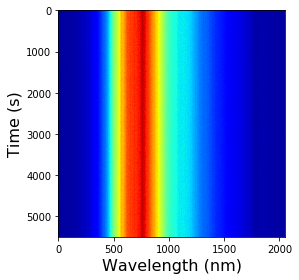

In [14]:
port = input("Which port number is is the teensy?: ").strip()
exp_name = input("What do you want to call this experiment: ") 
exp_name = exp_name.strip().replace(" ", "_")

# Outputs a text file to folder
txt_file = open("Scan CSV Files/txt/{}.txt".format(exp_name), "w")
txt_file.write("Odorant times: {}\nClean Times: {}\nScans per second: {}".format(odorant_time, clean_time, delay_time))
txt_file.close()

# Writing spectrum to a CSV file
df = pd.DataFrame()
df["Wavelengths"] = spec.wavelengths()
df.set_index("Wavelengths")
    
sys.stdout.write("Capture: ")

ser = serial.Serial("COM{}".format(port), 9600)

intensities = []
   
# Recipe for single odorant
for i in range(len(odorant_time)): 
    nitro_arg = [clean_time[i], ser, intensities, spec, delay_time]
    
    Nitrogen(*nitro_arg)
    odorant_arg = [odorant_time[i], ser, intensities, spec, delay_time]
    
    
    Water(*odorant_arg)
    
for i in range(len(intensities)):
    df["{}".format(i/delay_time)] = intensities[i]

df.to_csv("Scan CSV Files/{}.csv".format(exp_name)) # Writing to the CSV file
    
ser.close() # Closing serial
    
sys.stdout.write("\n" + "Done Captures")

plot_river(np.array(intensities),plt, np)

plt.savefig("Scan CSV Files/PNG/{}.png".format(exp_name))

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_xticklabels(df["Wavelengths"])
plt.imshow(intensities, aspect=len(df["Wavelengths"])/(len(intensities)), cmap=plt.cm.hsv)

Data Analysis

In [ ]:
exp_name = input("Experiment Name you want to analyze: ")
df = pd.read_csv("{}.csv".format(exp_name))

fig = plt.Figure(figsize=(12,12))
ax = fig.add_suplot(111)
ax.set_xticklabels(df.columns)
ax.set_yticklables(df["Wavelengths"])
plt.imshow(df)

In [ ]:
ser = serial.Serial("COM4", 9600)
ser.write(b'abcd')
ser.close()